In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from sklearn import svm

In [2]:
def cm2inch(value):
        return value/2.54


mpl.rcParams['figure.figsize'] = [cm2inch(10),cm2inch(10)]
mpl.rcParams['legend.fontsize'] = 6
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['font.family'] = "Arial"

### load latent space

In [3]:
mu = np.load('../output/latent_space_combine_num_samples_21157_num_sites_378_z_dim_2.npy')
mu_WT = mu[0:11631]
mu_depletion = mu[11631:]
print ('WT cell has %d chromatin images'%(len(mu_WT)))
print ('Depletion cell has %d chromatin images'%(len(mu_depletion)))

WT cell has 11631 chromatin images
Depletion cell has 9526 chromatin images


### plot latent space with decision boundary obtained from SVM

('w', array([-2.18577366, -0.3854608 ]))


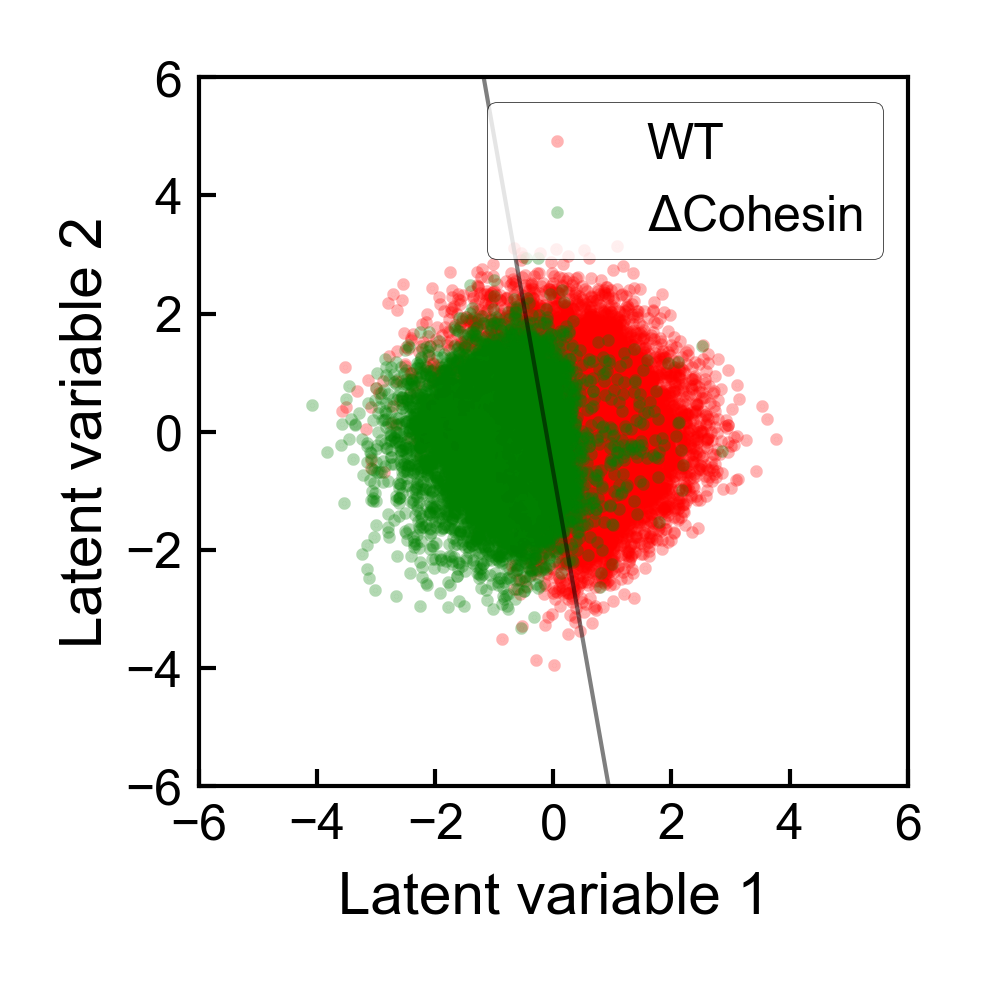

In [4]:
# latent space
fig = plt.figure(0)
ax = fig.add_axes([0.16, 0.16, 0.3, 0.3])

plt.plot(mu_WT[:, 0], mu_WT[:, 1], '.', alpha = 0.3, markersize = 1, color = 'r', label = 'WT')
plt.plot(mu_depletion[:, 0], mu_depletion[:, 1], '.', alpha = 0.3, markersize = 1, color = 'g', label = '$\Delta$Cohesin')

# SVM
mu_svm = [mu[:, 0], mu[:, 1]]
X_svm = np.transpose(mu_svm)
Y_svm = np.array([0]*11631 + [1]*9526)
C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel = 'linear', gamma = 0.7, C = C )
clf.fit(X_svm, Y_svm)

w = clf.coef_[0]
print ('w', w)
a = -w[0] / w[1]
xx = np.linspace(-6, 6)
yy = a*xx - (clf.intercept_[0])/w[1]

plt.plot(xx, yy, 'k-', lw = 0.5, alpha = 0.5)

# figure parameters
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.xlabel('Latent variable 1', fontsize = '7')
plt.ylabel('Latent variable 2', fontsize = '7')
plt.xticks([-6, -4, -2, 0, 2, 4, 6], fontsize = 6, rotation = 0)
plt.yticks([-6, -4, -2, 0, 2, 4, 6], fontsize = 6, rotation = 0)

ax.minorticks_off()
ax.xaxis.set_label_coords(0.5, -0.12)
ax.yaxis.set_label_coords(-0.12, 0.5)
ax.tick_params(which = 'major', pad = 2, direction = 'in', length = 2, width = 0.5)
plt.legend(loc = 'best',frameon = False)
ax.legend().get_frame().set_linewidth(0.1)

# show figure
plt.savefig('VAE_2D_latent.pdf',dpi=600)
plt.show()

### plot latent space with 5% data to avoid overplotting

In [5]:
#randomly sample 5% data
np.random.seed(1234)
mu_WT = np.copy(mu[0:11631])
np.random.shuffle(mu_WT)
mu_WT_sample = mu_WT[0:int(len(mu_WT)/20)]

mu_depletion = np.copy(mu[11631:])
np.random.shuffle(mu_depletion)
mu_depletion_sample = mu_depletion[0:int(len(mu_depletion)/20)]

('w', array([-2.18577366, -0.3854608 ]))


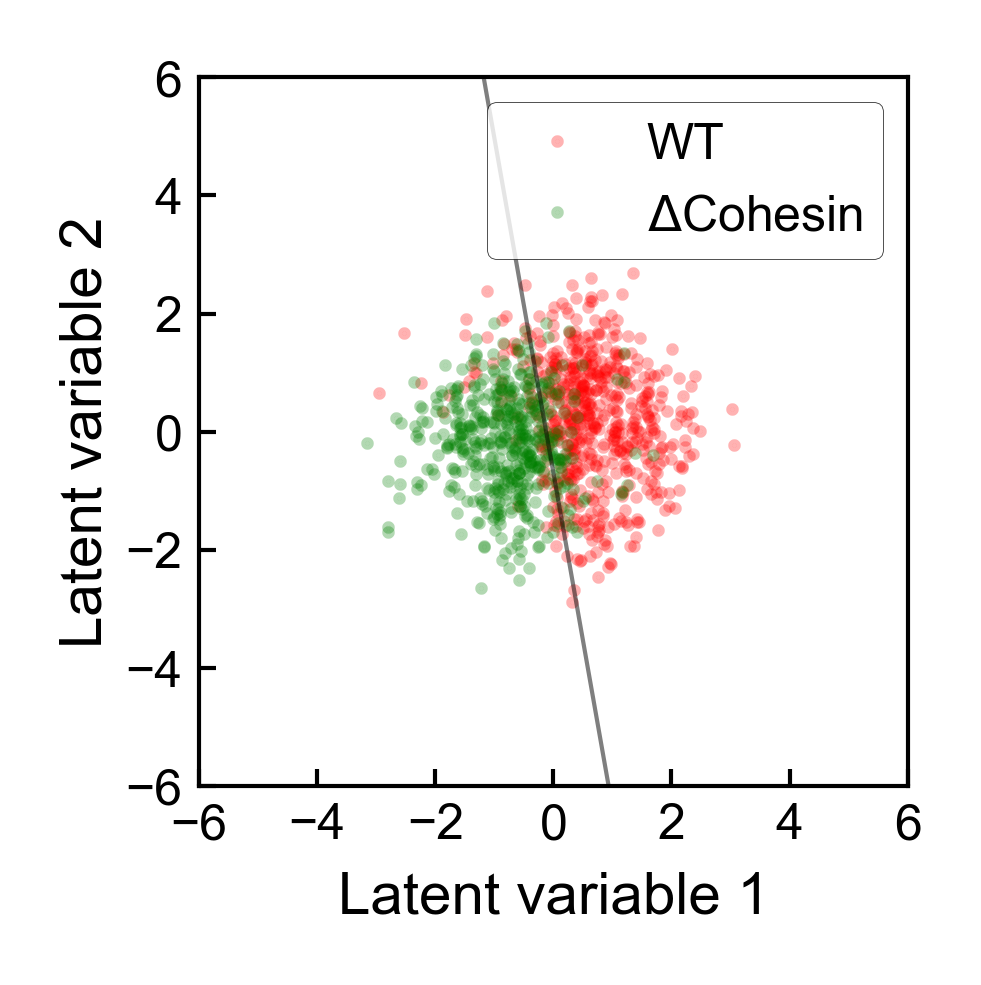

In [6]:
# latent space
fig = plt.figure(0)
ax = fig.add_axes([0.16, 0.16, 0.3, 0.3])

plt.plot(mu_WT_sample[:, 0], mu_WT_sample[:, 1], '.', alpha = 0.3, markersize = 1, color = 'r', label = 'WT')
plt.plot(mu_depletion_sample[:, 0], mu_depletion_sample[:, 1], '.', alpha = 0.3, markersize = 1, color = 'g', label = '$\Delta$Cohesin')

# SVM
mu_svm = [mu[:, 0], mu[:, 1]]
X_svm = np.transpose(mu_svm)
Y_svm = np.array([0]*11631 + [1]*9526)
C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel = 'linear', gamma = 0.7, C = C )
clf.fit(X_svm, Y_svm)

w = clf.coef_[0]
print ('w', w)
a = -w[0] / w[1]
xx = np.linspace(-6, 6)
yy = a*xx - (clf.intercept_[0])/w[1]

plt.plot(xx, yy, 'k-', lw = 0.5, alpha = 0.5)

# figure parameters
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.xlabel('Latent variable 1', fontsize = '7')
plt.ylabel('Latent variable 2', fontsize = '7')
plt.xticks([-6, -4, -2, 0, 2, 4, 6], fontsize = 6, rotation = 0)
plt.yticks([-6, -4, -2, 0, 2, 4, 6], fontsize = 6, rotation = 0)

ax.minorticks_off()
ax.xaxis.set_label_coords(0.5, -0.12)
ax.yaxis.set_label_coords(-0.12, 0.5)
ax.tick_params(which = 'major', pad = 2, direction = 'in', length = 2, width = 0.5)
plt.legend(loc = 'best',frameon = False)
ax.legend().get_frame().set_linewidth(0.1)

# show figure
plt.savefig('VAE_2D_latent_5percent.pdf',dpi=600)
plt.show()

### KL divergence (distribution on 2D latent space)


In [7]:
# get the probability distribution
mu_WT = np.copy(mu[0:11631])
mu_depletion = np.copy(mu[11631:])


x_min = -6.0
x_max = 6.0
nbin = 40
interval = (x_max - x_min)/nbin

mu_WT_dim_1 = [int(round(x)) for x in (-mu_WT[:,0] - x_min) / interval]
mu_WT_dim_2 = [int(round(x)) for x in (-mu_WT[:,1] - x_min) / interval]
mu_WT_index = np.concatenate(([mu_WT_dim_1], [mu_WT_dim_2]), axis = 0).T
mu_WT_density = np.zeros((nbin, nbin), dtype = np.float)
for cell in mu_WT_index:
    mu_WT_density[cell[0]][cell[1]] += 1
mu_WT_density /= len(mu_WT)


mu_depletion_dim_1 = [int(round(x)) for x in (-mu_depletion[:,0] - x_min) / interval]
mu_depletion_dim_2 = [int(round(x)) for x in (-mu_depletion[:,1] - x_min) / interval]
mu_depletion_index = np.concatenate(([mu_depletion_dim_1], [mu_depletion_dim_2]), axis = 0).T
mu_depletion_density = np.zeros((nbin, nbin), dtype = np.float)
for cell in mu_depletion_index:
    mu_depletion_density[cell[0]][cell[1]] += 1
mu_depletion_density /= len(mu_depletion)

# get the KL divergence
KL = 0.0
for i in range(nbin):
    for j in range(nbin):
        if mu_WT_density[i][j] > 0.0 and mu_depletion_density[i][j] > 0.0:
            KL += mu_WT_density[i][j]*np.log(mu_WT_density[i][j]/mu_depletion_density[i][j])
print ('2D latent space: KL divergence is %f'%(KL))

2D latent space: KL divergence is 1.992876


### folding coordinate

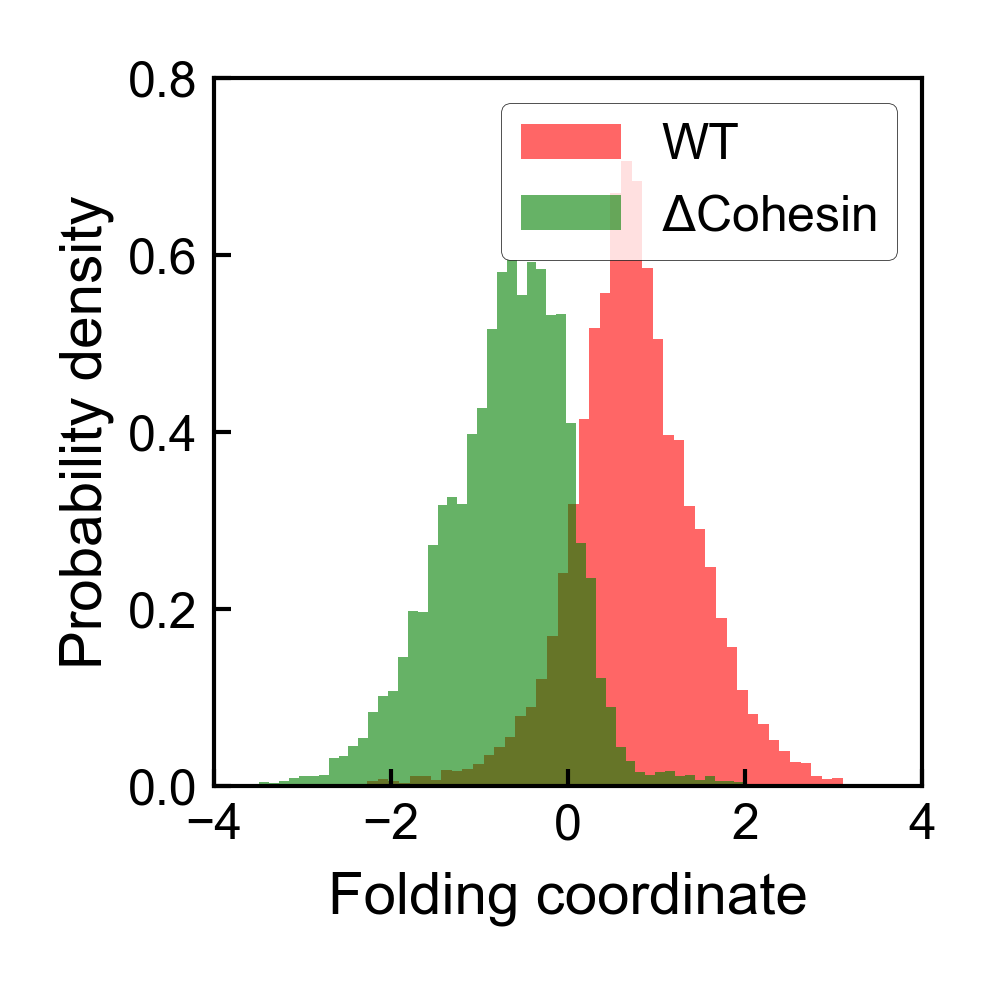

In [8]:
# get the distance for a data point to the decision boundary
y_decision = clf.decision_function(X_svm)
w_norm = np.linalg.norm(clf.coef_)
dist = y_decision / w_norm
dist_WT = dist[0:11631]
dist_depletion = dist[11631:]

# plot the histogram of folding coordinate
fig = plt.figure(0)
ax = fig.add_axes([0.16,0.16,0.3,0.3])

plt.hist(-dist_WT,bins=60,density=1,color = 'r',alpha=0.6,label='WT')
plt.hist(-dist_depletion,bins=60,density=1,color = 'g',alpha=0.6,label='$\Delta$Cohesin')

# figure parameters
plt.xlim(-4, 4)
plt.ylim(0, 0.8)
plt.xlabel('Folding coordinate', fontsize = '7')
plt.ylabel('Probability density', fontsize = '7')
plt.xticks([-4, -2, 0, 2, 4], fontsize = 6, rotation = 0)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8], fontsize = 6, rotation = 0)

ax.minorticks_off()
ax.xaxis.set_label_coords(0.5, -0.12)
ax.yaxis.set_label_coords(-0.14, 0.5)
ax.tick_params(which = 'major', pad = 2, direction = 'in', length = 2, width = 0.5)
plt.legend(loc = 'best',frameon = False)
ax.legend().get_frame().set_linewidth(0.1)

# show figure
plt.savefig('VAE_RC.pdf',dpi=600)
plt.show()

### KL divergence (distribution along the folding coordinate)

In [9]:
# get the probability distribution
x_min = -6.0
x_max = 6.0
nbin = 40
interval = (x_max - x_min)/nbin

mu_WT_index = [int(round(x)) for x in (dist_WT - x_min) / interval]
mu_WT_density = np.zeros(nbin, dtype = np.float)
for cell in mu_WT_index:
    mu_WT_density[cell] += 1
mu_WT_density /= len(mu_WT)


mu_depletion_index = [int(round(x)) for x in (dist_depletion - x_min) / interval]
mu_depletion_density = np.zeros(nbin, dtype = np.float)
for cell in mu_depletion_index:
    mu_depletion_density[cell] += 1
mu_depletion_density /= len(mu_depletion)


# get the KL divergence
KL = 0.0
for i in range(nbin):
    if mu_WT_density[i] > 0.0 and mu_depletion_density[i] > 0.0:
        KL += mu_WT_density[i]*np.log(mu_WT_density[i]/mu_depletion_density[i])
print ('Folding coordinate: KL divergence is %f'%(KL))

Folding coordinate: KL divergence is 2.137257
